In [1]:

# 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:

# 2. Load Dataset
digits = load_digits()
X = digits.data          # Flattened images (64 features)
y = digits.target

print("Original Shape:", X.shape)


Original Shape: (1797, 64)


In [3]:

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:

# 4. Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:

# ===============================
# MODEL 1: Logistic Regression (Original Dataset)
# ===============================
lr_original = LogisticRegression(max_iter=1000)
lr_original.fit(X_train_scaled, y_train)
y_pred_original = lr_original.predict(X_test_scaled)

original_accuracy = accuracy_score(y_test, y_pred_original)
print("\nAccuracy (Original Dataset):", original_accuracy)



Accuracy (Original Dataset): 0.9722222222222222


In [6]:

# ===============================
# Apply PCA with Multiple Components
# ===============================
component_list = [2, 10, 30, 50]
accuracy_results = {}

for n in component_list:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    lr = LogisticRegression(max_iter=1000)
    lr.fit(X_train_pca, y_train)
    y_pred = lr.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    accuracy_results[n] = acc

    print(f"Accuracy with {n} components:", acc)


Accuracy with 2 components: 0.5166666666666667
Accuracy with 10 components: 0.8861111111111111
Accuracy with 30 components: 0.9611111111111111
Accuracy with 50 components: 0.9722222222222222


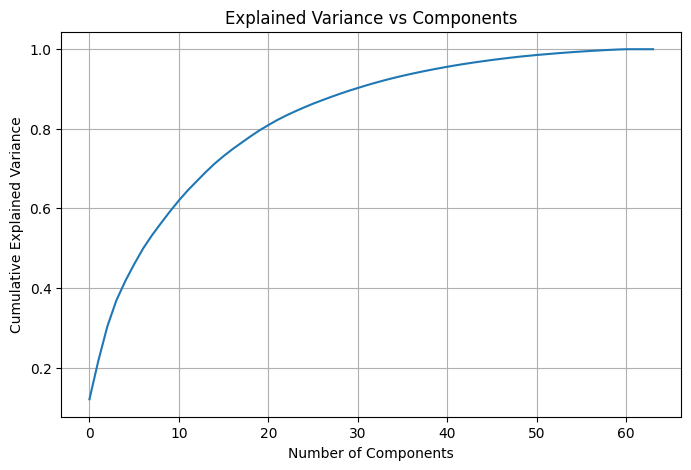

In [7]:

# ===============================
# Explained Variance Plot
# ===============================
pca_full = PCA()
pca_full.fit(X_train_scaled)

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Components")
plt.grid()
plt.show()


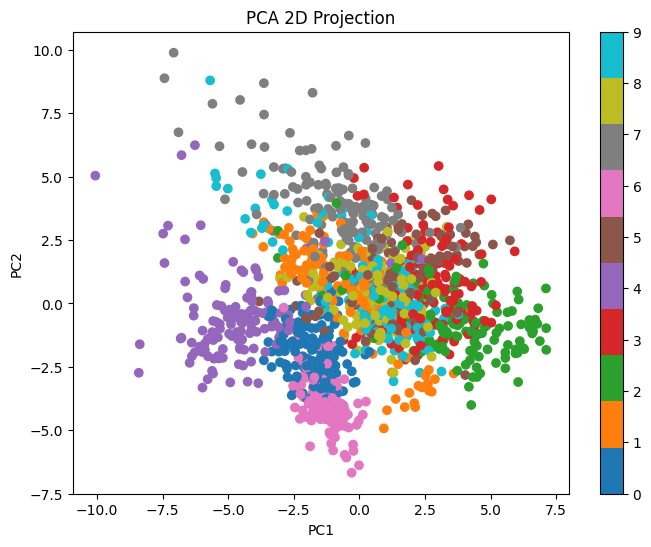

In [8]:

# ===============================
# PCA 2D Visualization
# ===============================
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=y_train, cmap='tab10')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D Projection")
plt.colorbar(scatter)
plt.show()


In [9]:

# ===============================
# Reduced Dataset Example (30 Components)
# ===============================
pca_30 = PCA(n_components=30)
X_reduced = pca_30.fit_transform(X_train_scaled)

print("\nReduced Dataset Shape (30 components):", X_reduced.shape)



Reduced Dataset Shape (30 components): (1437, 30)
